In [8]:
import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors, AllChem
import matplotlib.pyplot as plt
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.Fingerprints import FingerprintMols
from collections.abc import Iterable
from rdkit.Chem import rdFingerprintGenerator

In [9]:
df = pd.DataFrame(
    {
        'mor': ['morphine', 'fentanyl', 'methadone', 'DAMGO', 'pzm', 'trv', '19', '7'], 
        'smiles': [
            'CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5', 
            'O=C(CC)N(C1CCN(CC1)CCc2ccccc2)c3ccccc3', 
            'CCC(C(C1=CC=CC=C1)(C2=CC=CC=C2)CC(N(C)C)C)=O', 
            'C[C@@H](NC([C@@H](N)CC1=CC=C(O)C=C1)=O)C(NCC(N([C@H](C(NCCO)=O)CC2=CC=CC=C2)C)=O)=O', 
            'O=C(N[C@H](CC1=CSC=C1)C)NC[C@H](CC2=CC=C(O)C=C2)N(C)C', 
            'COC1=C(CNCC[C@]2(CCOC3(CCCC3)C2)C2=NC=CC=C2)SC=C1', 
            'OC(C1)CC[C@]1(C2)OCC[C@]2(C3=NC=CC=C3)CCNCC4=C(S)C=CC=C4', 
            'FC1=CC=C(C2(CCOC3(CCCC3)C2)CCNCC4=CC=CC=C4)C=C1'
        ]
    }
)

In [10]:
def get_maccs_fps(mols:list):
    
    maccs_fps = [AllChem.GetMACCSKeysFingerprint(mol) for mol in mols]
    #similarities = np.zeros([len(mols), len(mols)]).fill(np.nan)
    similarities = []
    for i in range(len(mols)):
        maccs = DataStructs.BulkTanimotoSimilarity(maccs_fps[i], maccs_fps[i+1:])
        maccs_ = np.concat([np.repeat(np.nan, i+1), maccs])
        similarities.append(maccs_)
    similarities = np.array(similarities)
    similarities.reshape(len(mols), len(mols))
    return similarities
    
    
#a = get_maccs_fps([Chem.MolFromSmiles(smile) for smile in df['smiles']])

In [11]:
def get_morgan_fps(mols:list):
    gen = rdFingerprintGenerator.GetMorganGenerator(radius=4, fpSize=1024)
    morgan_fps = [gen.GetFingerprint(mol) for mol in mols]
    
    similarities = []
    for i in range(len(mols)):
        morgan = DataStructs.BulkTanimotoSimilarity(morgan_fps[i], morgan_fps[i+1:])
        morgan_ = np.concat([np.repeat(np.nan, i+1), morgan])
        similarities.append(morgan_)
    similarities = np.array(similarities)
    similarities.reshape(len(mols), len(mols))
    return similarities

#get_morgan_fps([Chem.MolFromSmiles(smile) for smile in df['smiles']])    

In [12]:
def get_avalon__fps(mols:list):
    
    avalon_fps = [pyAvalonTools.GetAvalonFP(mol) for mol in mols]
    
    similarities = []
    for i in range(len(mols)):
        avalon = DataStructs.BulkTanimotoSimilarity(avalon_fps[i], avalon_fps[i+1:])
        avalon_ = np.concat([np.repeat(np.nan, i+1), avalon])
        similarities.append(avalon_)
    similarities = np.array(similarities)
    similarities.reshape(len(mols), len(mols))
    return similarities
    
get_avalon__fps([Chem.MolFromSmiles(smile) for smile in df['smiles']])

array([[       nan, 0.20699708, 0.19764012, 0.28366762, 0.32972973,
        0.49481865, 0.48493151, 0.31161473],
       [       nan,        nan, 0.40540541, 0.31125828, 0.26701571,
        0.22014925, 0.24255319, 0.23837209],
       [       nan,        nan,        nan, 0.26666667, 0.2513369 ,
        0.18587361, 0.20851064, 0.22754491],
       [       nan,        nan,        nan,        nan, 0.47593583,
        0.27112676, 0.23954373, 0.24747475],
       [       nan,        nan,        nan,        nan,        nan,
        0.40138408, 0.27147766, 0.25431034],
       [       nan,        nan,        nan,        nan,        nan,
               nan, 0.63082437, 0.48616601],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.57142857],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan]])

In [13]:
dir(Chem)

['ADJUST_IGNOREALL',
 'ADJUST_IGNORECHAINS',
 'ADJUST_IGNOREDUMMIES',
 'ADJUST_IGNOREMAPPED',
 'ADJUST_IGNORENONDUMMIES',
 'ADJUST_IGNORENONE',
 'ADJUST_IGNORERINGS',
 'ALLOW_CHARGE_SEPARATION',
 'ALLOW_INCOMPLETE_OCTETS',
 'AROMATICITY_CUSTOM',
 'AROMATICITY_DEFAULT',
 'AROMATICITY_MDL',
 'AROMATICITY_MMFF94',
 'AROMATICITY_RDKIT',
 'AROMATICITY_SIMPLE',
 'AddHs',
 'AddHsParameters',
 'AddMetadataToPNGFile',
 'AddMetadataToPNGString',
 'AddMolSubstanceGroup',
 'AddRecursiveQuery',
 'AddStereoAnnotations',
 'AddWavyBondsForStereoAny',
 'AdjustQueryParameters',
 'AdjustQueryProperties',
 'AdjustQueryPropertiesWithGenericGroups',
 'AdjustQueryWhichFlags',
 'AllChem',
 'AllProps',
 'AromaticityModel',
 'AssignAtomChiralTagsFromMolParity',
 'AssignAtomChiralTagsFromStructure',
 'AssignCIPLabels',
 'AssignChiralTypesFromBondDirs',
 'AssignRadicals',
 'AssignStereochemistry',
 'AssignStereochemistryFrom3D',
 'Atom',
 'AtomFromSmarts',
 'AtomFromSmiles',
 'AtomHasConjugatedBond',
 'AtomKekuli

In [14]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps


ImportError: DLL load failed while importing rdMolDraw2D: 找不到指定的模块。

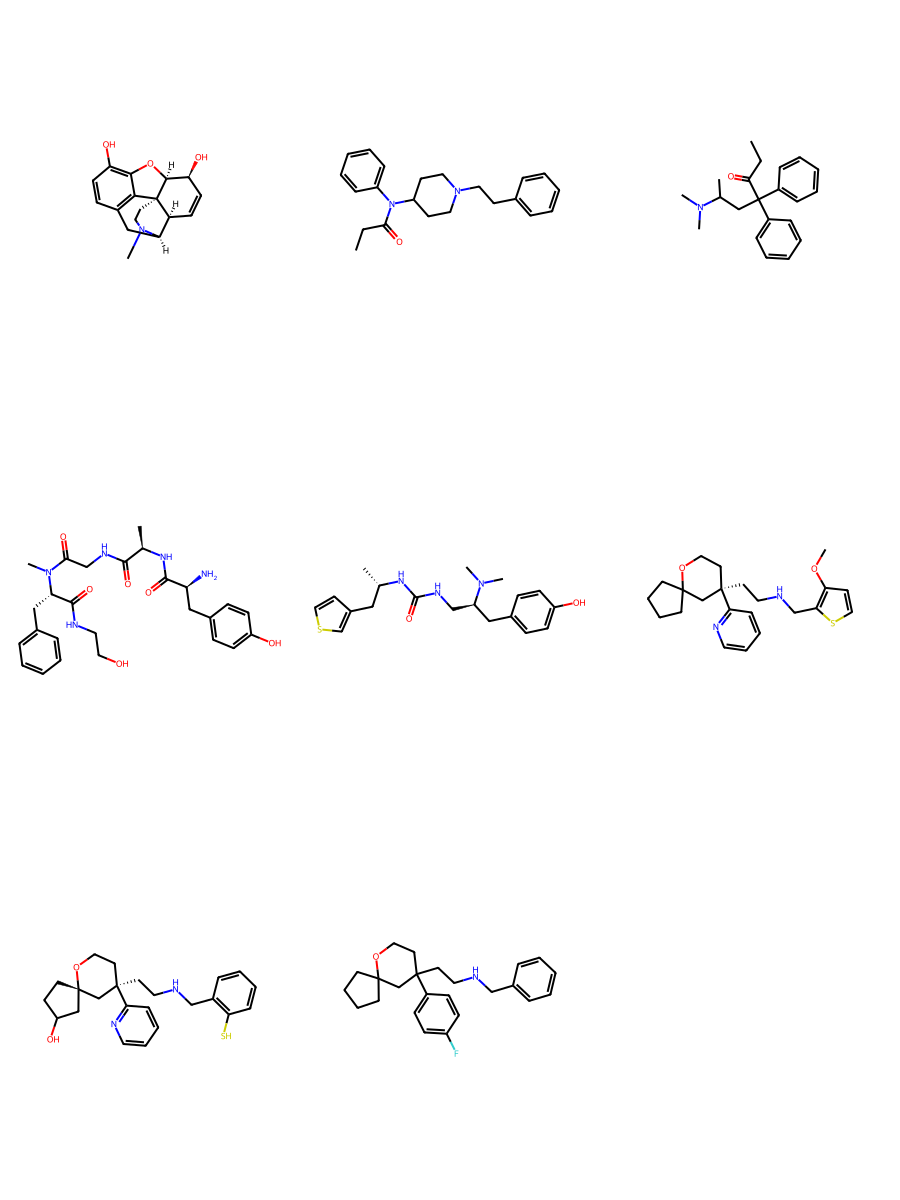

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in df['smiles']]
Draw.MolsToGridImage(mols, subImgSize=(300,400))

In [ ]:
gen = rdFingerprintGenerator.GetMorganGenerator(radius=4, fpSize=1024)
morgan_fps = [gen.GetFingerprint(mol) for mol in mols]

morgan_fps = [gen.GetFingerprint(mol) for mol in mols]
i=4
morgan = DataStructs.BulkTanimotoSimilarity(morgan_fps[i], morgan_fps[i+1:])
morgan_ = np.concat([np.repeat(np.nan, i+1), morgan])

In [ ]:
draw2d = Draw.MolDraw2DCairo(600, 600)
weight = SimilarityMaps.GetAtomicWeightsForFingerprint(mols[-2], mols[-1], SimilarityMaps.GetMorganFingerprint)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mols[-2], weight, draw2d=None)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mols[-1], weight, draw2d=draw2d)

[21:12:59] DEPRECATION WARNING: please use MorganGenerator
[21:12:59] DEPRECATION WARNING: please use MorganGenerator


ValueError: the draw2d argument must be provided

In [ ]:
weight

[-0.027289266221952713,
 0.003095975232198178,
 0.003095975232198178,
 -0.0025031289111389077,
 0.0678733031674208,
 0.1386071670047329,
 0.13380736910148677,
 0.09930423782416192,
 0.11636828644501279,
 0.10718954248366014,
 0.05629348513598986,
 0.008578431372548989,
 0.008578431372548989,
 0.05629348513598986,
 0.10718954248366014,
 0.13380736910148677,
 0.09930423782416192,
 0.09930423782416192,
 0.05629348513598986,
 0.05629348513598986,
 0.03478810879190386,
 0.04520123839009288,
 0.03456640388114007,
 0.04520123839009288,
 0.03478810879190386,
 -0.0025031289111389077,
 0.003095975232198178]